In [1]:
import pickle
import matplotlib.pyplot as plt
import random

In [2]:
image_data = pickle.load(open('mydata.pkl','rb'))
random.shuffle(image_data)
features=[]
labels=[]

for feature,label in image_data:
    features.append(feature)
    labels.append(label)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(features,labels,test_size=0.3)

In [4]:
x_train

[array([ 43,  72,  53, ..., 122, 120, 110], dtype=uint8),
 array([179, 185, 187, ...,  62,  37,  12], dtype=uint8),
 array([ 86,  88,  95, ..., 247, 239, 236], dtype=uint8),
 array([ 92, 181, 173, ...,  98,  90,  79], dtype=uint8),
 array([161, 147, 159, ...,  79, 106, 130], dtype=uint8),
 array([204, 203, 202, ...,  93,  95,  93], dtype=uint8),
 array([205, 205, 206, ...,  60, 105, 110], dtype=uint8),
 array([130, 128, 128, ..., 103, 105, 105], dtype=uint8),
 array([231, 232, 231, ..., 110, 187, 136], dtype=uint8),
 array([237, 238, 237, ...,  93,  45,  24], dtype=uint8),
 array([62, 11, 27, ..., 56, 24, 12], dtype=uint8),
 array([227, 228, 227, ...,  35,  57,  38], dtype=uint8),
 array([227, 228, 227, ...,  35,  57,  38], dtype=uint8),
 array([248, 250, 249, ..., 120, 117, 117], dtype=uint8),
 array([128, 139, 163, ...,  95,  91,  94], dtype=uint8),
 array([226, 224, 227, ..., 118, 138, 119], dtype=uint8),
 array([254, 254, 254, ..., 178, 222, 211], dtype=uint8),
 array([248, 248, 24

In [5]:
y_train

[2,
 3,
 2,
 2,
 2,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 0,
 0,
 0,
 3,
 3,
 2,
 2,
 0,
 3,
 2,
 2,
 1,
 0,
 3,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 3,
 1,
 0,
 3,
 3,
 3,
 0,
 0,
 3,
 1,
 0,
 2,
 0,
 0,
 3,
 1,
 0,
 3,
 2,
 3,
 3,
 1,
 3,
 0,
 2,
 2,
 1,
 2,
 3,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 3,
 3,
 3,
 3,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 3,
 1,
 1,
 0,
 1,
 3,
 2,
 0,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 0,
 2,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 2,
 0,
 0,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 0,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 3,
 0,
 0,
 1,
 3,
 1,
 2,
 1,
 3,
 3,
 3,
 0,
 1,
 1,
 3,
 2,
 0,
 3,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 3,
 3,
 2,
 0,
 3,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 3,
 2,
 2,
 0,
 0,
 3,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 3,
 2,
 2,
 1,


In [6]:
from sklearn.svm import SVC

In [7]:
parameters = {
    'C':[10,1.0,0.1,0.01],
    'kernel':[ 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2,3],
}

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 1.0, 0.1, 0.01], 'degree': [1, 2, 3],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [9]:
prediction = grid.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))

0.87
[[59  1  3  8]
 [ 4 80  0  1]
 [ 3  0 68  2]
 [16  0  1 54]]


In [10]:
grid.best_params_

{'C': 10, 'degree': 1, 'kernel': 'rbf'}

prediction is oil_spill


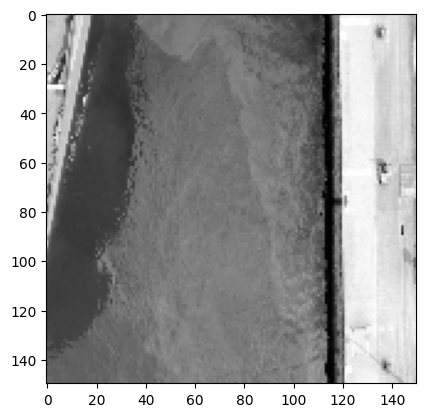

In [11]:

water = x_test[20].reshape(150,150)
categories = ['algae','clean','oil_spill','plastic']

print("prediction is", categories[prediction[20]])
plt.imshow(water,cmap='gray')
plt.show()

In [12]:
pickle.dump(grid,open('tunnedModel.pkl','wb'))